# DATS 6103 - Individual Project 3 - Jesse Borg

## 1. Introduction

Cancer is among the leading causes of death worldwide. In 2012, there were 14.1 million new cases and 8.2 million cancer-related deaths worldwide. In the US alone, approximately 1.7 million new cases were diagnosed and over 600,000 people died from the disease. Although rates of smoking; a major cause of cancer, have declined, the U.S. population is aging, and cancer rates increase with age. Obesity is also increasing, which is another major cause in cancer; this means that over the years, some cancer types have decreased whilst other types have stabilized or increased. The types of cancer which are most prevalent can be an indicator of the habits a society has developed in general. Overall however, the death rate in the US from cancer has fallen by more than 25% since 1991 (https://www.cancer.gov/about-cancer/understanding/statistics).

This project will analyze the overall cancer rates in the US between 2000 and 2016. It will also look at more specific trends such as cancer rates by state, the most common types of cancer and how race, gender and age affects the liklehood of contracting the disease. Since there is so much data available for cancer in the US, it is impossible to manually go through each incident one by one, so an analysis using data mining methods makes sense.

The aim of this project is to get an insight as to how the rate of cancer has changed since the turn of the millenium and provide information as to which group of people are most likely to get cancer according to the data. This analysis will also serve as a platform to be able to make predictions on how cancer rates will change in the future.

The required datasets for this analysis were obtained by permission from the CDC (https://www.cdc.gov/), where they were available to download. Once the data was downloaded and converted CSV files, the cleaning process could begin so that the analysis would yield accurate and meaningful results. Supplementary datasets such as the Cancer rate by state was obtained from the NIH (https://www.nih.gov/).

## 2. Cleaning Process

Since different datasets with a wide range of variables are going to be used for this analysis, the best way to approach this is to initially read each CSV file and print the first five rows to inspect the overall structure of each dataframe. Then, the unwanted variables will be removed so that what is left is the relevant information needed for this analysis, as mentioned above. To make it easier to call different variables, any columns with complicated names will be renamed appropriately. This will also ensure that the code looks as neat as possible and efficient to work with.

Once this has been completed, the data can then be plotted in various ways to make it easy to observe changes over time, patterns, or any correlations that may exist. Below, this cleaning process was carried out and then the resulting dataframe was used to plot the desired data.

I decided to keep the datasets separate as they are much easier to work with, especially because each datasets looks at different aspects of cancer, and if combined into one large dataset it could lead to complications. Not all of the data available was used as there was too much information to include.

In [1]:
# Import the required tools from the Python library and then abbreviate them to make it easier and quicker to call upon when needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import display
import plotly
import chart_studio.plotly as py
import plotly.io as pio
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import os
from os import path
from itertools import groupby
import glob
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50) # This means that all of the columns will show when the dataframe is called
pd.set_option('display.max_rows', 250)

In [2]:
# Import the initial datasets using the Pandas library
# Check to see if the data was read correctly for each data set by using the df.head() function
incidence = pd.read_csv('incidence_all_cancer.csv')
display(incidence.head())

print()
print('------------------------------------------------------------------------------------')

state = pd.read_csv('cancer_rate_by_state.csv')
display(state.head())

# More datasets will probably be used later on, but I will import and clean as required

Sex                 Race/Ethnicity       Age       Rate Type  Year  \
0  Both Sexes  All Races (includes Hispanic)  All Ages  Observed Rates  2000   
1  Both Sexes  All Races (includes Hispanic)  All Ages  Observed Rates  2001   
2  Both Sexes  All Races (includes Hispanic)  All Ages  Observed Rates  2002   
3  Both Sexes  All Races (includes Hispanic)  All Ages  Observed Rates  2003   
4  Both Sexes  All Races (includes Hispanic)  All Ages  Observed Rates  2004   

  Age-adjusted (AA) Rate per 100,000 AA Rate Lower Confidence Interval  \
0                           489.4397                          488.0715   
1                           490.3531                          488.9932   
2                           487.7399                          486.3942   
3                           475.2225                          473.9042   
4                           476.4208                          475.1091   

  AA Rate Upper Confidence Interval Trend Year Range  \
0                          490.8108        2000-2004   
1                          491.7157        2004-2007   
2                          489.0884        2007-2016   
3                          476.5435              NaN   
4                          477.7352              NaN   

  Annual Percent Change (APC) (%) APC Lower Confidence Interval (%)  \
0                         -0.9573                           -1.7934   
1                          0.7215                            -1.903   
2                         -1.2739                           -1.5028   
3                             NaN                               NaN   
4                             NaN                               NaN   

  APC Upper Confidence Interval (%)   Trend Direction  
0                           -0.1142  Trend is Falling  
1                            3.4162            Stable  
2                           -1.0444  Trend is Falling  
3                               NaN               NaN  
4                               NaN               NaN


------------------------------------------------------------------------------------


Year        Area           CancerType  AgeAdjustedRate    lci    uci  \
0  2000    Colorado  All Types of Cancer            453.9  447.0  460.9   
1  2000    Virginia  All Types of Cancer            438.6  433.6  443.7   
2  2000  California  All Types of Cancer            460.1  457.7  462.5   
3  2000     Georgia  All Types of Cancer            473.2  468.0  478.4   
4  2000       Idaho  All Types of Cancer            475.4  463.1  488.0   

  CaseCount  Population  
0     16774   4326921.0  
1     29629   7105817.0  
2    137413  33987977.0  
3     32991   8227303.0  
4      5678   1299430.0

In [3]:
# Start by cleaning the incidence dataframe

# After inspecting the dataframe, drop any unwanted or irrelevant columns
incidence.drop(['AA Rate Lower Confidence Interval', 'AA Rate Upper Confidence Interval',
                'Trend Year Range', 'Annual Percent Change (APC) (%)', 'APC Lower Confidence Interval (%)',
                'APC Upper Confidence Interval (%)', 'Trend Direction'], axis = 1, inplace = True)

# Rename any columns to make easier to call upon
incidence.rename(columns = {'Age-adjusted (AA) Rate per 100,000' : 'Rate'}, inplace = True)

# Since some of the rate values are just a -, remove these rows
incidence = incidence[incidence['Rate'] != '-']

# Convert the remaining rate values to float, so they can be plotted
incidence['Rate'] = incidence['Rate'].astype(float)

incidence.head()

Sex                 Race/Ethnicity       Age       Rate Type  Year  \
0  Both Sexes  All Races (includes Hispanic)  All Ages  Observed Rates  2000   
1  Both Sexes  All Races (includes Hispanic)  All Ages  Observed Rates  2001   
2  Both Sexes  All Races (includes Hispanic)  All Ages  Observed Rates  2002   
3  Both Sexes  All Races (includes Hispanic)  All Ages  Observed Rates  2003   
4  Both Sexes  All Races (includes Hispanic)  All Ages  Observed Rates  2004   

       Rate  
0  489.4397  
1  490.3531  
2  487.7399  
3  475.2225  
4  476.4208

In [4]:
# Clean the mortality rate dataframe
mortality = pd.read_csv('mortality_rate_all_cancer.csv')

# After inspecting the dataframe, drop any unwanted or irrelevant columns
mortality.drop(['AA Rate Lower Confidence Interval', 'AA Rate Upper Confidence Interval',
                'Trend Year Range', 'Annual Percent Change (APC) (%)', 'APC Lower Confidence Interval (%)',
                'APC Upper Confidence Interval (%)', 'Trend Direction'], axis = 1, inplace = True)

# Rename any columns to make easier to call upon
mortality.rename(columns = {'Age-adjusted (AA) Rate per 100,000' : 'Rate'}, inplace = True)

# Since some of the rate values are just a -, remove these rows
mortality = mortality[mortality['Rate'] != '-']

# Convert the remaining rate values to float, so they can be plotted
mortality['Rate'] = mortality['Rate'].astype(float)

mortality.head()

Sex                 Race/Ethnicity       Age  Year      Rate
0  Both Sexes  All Races (includes Hispanic)  All Ages  2000  198.7863
1  Both Sexes  All Races (includes Hispanic)  All Ages  2001  196.2889
2  Both Sexes  All Races (includes Hispanic)  All Ages  2002  194.3559
3  Both Sexes  All Races (includes Hispanic)  All Ages  2003  190.8880
4  Both Sexes  All Races (includes Hispanic)  All Ages  2004  186.8410

In [5]:
# Clean the survival rate dataframe
survival = pd.read_csv('survival_rate_all_cancer.csv')

# After inspecting the dataframe, drop any unwanted or irrelevant columns
survival.drop(['5-Year Relative Survival Rate Lower Confidence Interval',
               '5-Year Relative Survival Rate Upper Confidence Interval','Trend Year Range',
               'Annual Percent Change (APC) (%)', 'APC Lower Confidence Interval (%)',
               'APC Upper Confidence Interval (%)', 'Trend Direction'], axis = 1, inplace = True)

# Rename any columns to make easier to call upon
survival.rename(columns = {'5-Year Relative Survival Rate (Percent Survivng)' : 'Rate'}, inplace = True)

# Since some of the rate values are just a -, remove these rows
survival = survival[survival['Rate'] != '-']

# Convert the remaining rate values to float, so they can be plotted
survival['Rate'] = survival['Rate'].astype(float)

survival.head()

Sex                 Race/Ethnicity       Age    Year  Survival Time  \
0  Both Sexes  All Races (includes Hispanic)  All Ages  1 year           2000   
1  Both Sexes  All Races (includes Hispanic)  All Ages  1 year           2001   
2  Both Sexes  All Races (includes Hispanic)  All Ages  1 year           2002   
3  Both Sexes  All Races (includes Hispanic)  All Ages  1 year           2003   
4  Both Sexes  All Races (includes Hispanic)  All Ages  1 year           2004   

      Rate  
0  77.7698  
1  78.1998  
2  78.5229  
3  78.2767  
4  78.8625

In [6]:
# Read the total number of cases dataframe
Count = pd.read_csv('number_of_cases.csv')
display(Count.head())

print()

# Check the datatype for the total count to make sure its correct
Count['CaseCount'].dtype

Area                   CancerType  Year  AgeAdjustedRate  \
0   United States    All Cancer Sites Combined   2000            483.9   
1   United States    All Cancer Sites Combined   2001            491.1   
2   United States    All Cancer Sites Combined   2002            488.7   
3   United States    All Cancer Sites Combined   2003            480.1   
4   United States    All Cancer Sites Combined   2004            479.6   

   CaseCount  Population  
0    1318591   275879626  
1    1375974   282115961  
2    1393208   284766512  
3    1406712   290107933  
4    1429336   292805298

dtype('int64')

In [7]:
# Cleaning the state dataframe

# After inspecting the dataframe, drop any unwanted or irrelevant columns
state.drop(['lci', 'uci'], axis = 1, inplace = True)

# Rename any columns to make easier to call upon
state.rename(columns = {'AgeAdjustedRate' : 'Rate'}, inplace = True)

state.head()

Year        Area           CancerType   Rate CaseCount  Population
0  2000    Colorado  All Types of Cancer  453.9     16774   4326921.0
1  2000    Virginia  All Types of Cancer  438.6     29629   7105817.0
2  2000  California  All Types of Cancer  460.1    137413  33987977.0
3  2000     Georgia  All Types of Cancer  473.2     32991   8227303.0
4  2000       Idaho  All Types of Cancer  475.4      5678   1299430.0

## 3. Comparing Cancer Rates Throughout the Years

To look at the cancer in the US, it is best to get an overall picture on the cancer rate per 100,000, the number of total reported cases and the survival and mortality rate between 2000-2016.

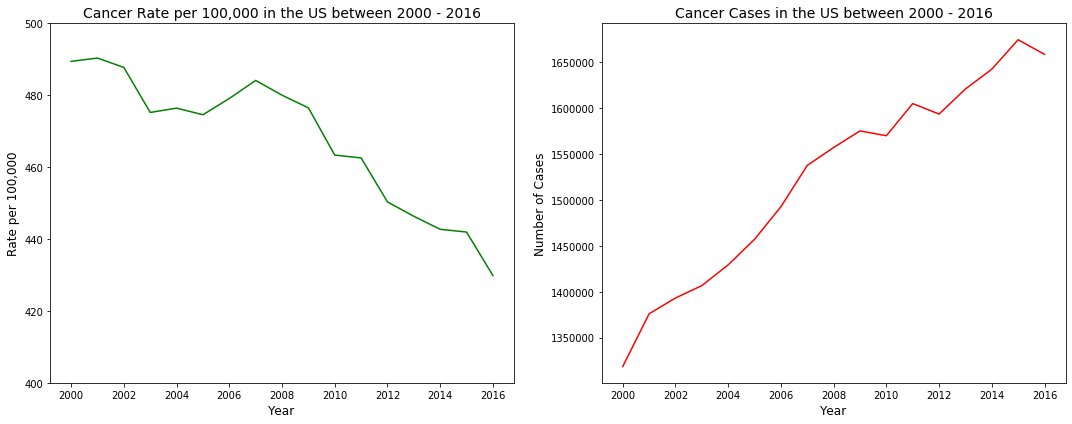

In [8]:
# Create a reduced dataframe with the rate for the entire US population using boolean operators
IncidenceAll = incidence[(incidence['Race/Ethnicity'] == 'All Races (includes Hispanic)')
                        & (incidence['Age'] == 'All Ages') & (incidence['Sex'] == 'Both Sexes') 
                        & (incidence['Rate Type'] == 'Observed Rates')]

# Create two plots side-by-side using the plt.subplot function
# This will make both graphs easy to compare
plt.figure(figsize=(15,6))

# Specify the position of the first graph (left)
plt.subplot(1,2,1)
plt.plot(IncidenceAll['Year'], IncidenceAll['Rate'], color = 'green')
plt.title('Cancer Rate per 100,000 in the US between 2000 - 2016', size = 14)
plt.xlabel('Year', size = 12)
plt.ylabel('Rate per 100,000', size = 12)
plt.ylim(400,500)

# Specify the position of the second graph (right)
plt.subplot(1,2,2)
plt.plot(Count['Year'], Count['CaseCount'], color = 'Red')
plt.title('Cancer Cases in the US between 2000 - 2016', size = 14)
plt.xlabel('Year', size = 12)
plt.ylabel('Number of Cases', size = 12)

# This function will make sure the graphs won't overlap and look more presentable
plt.tight_layout()
plt.show()

The graphs show the cancer rate per 100,000 in the US from 2000 - 2016 (left) and the total number of cases in the US from 2000 - 2016.

Even though the cancer rate per 100,000 is genereally decreasing and has been since 2000, the total number of cases has been increasing since 2000; with a decrease happening between 2015 and 2016. The number of cases is increasing due to the increase in population in the states, but the rate (which is more important) is decreasing. This means that a lower percentage of people in the US are getting cancer, and eventually the rate will be low enough that the total number of cases will also start decreasing significantly.

This decrease in cancer rates is because of a few factors; better knowledge of the disease and better treatments, people have healthier habits and less use of harmful substances.

### 3.1 Cancer Mortality Rate in the US From 2000 - 2016

(100, 200)

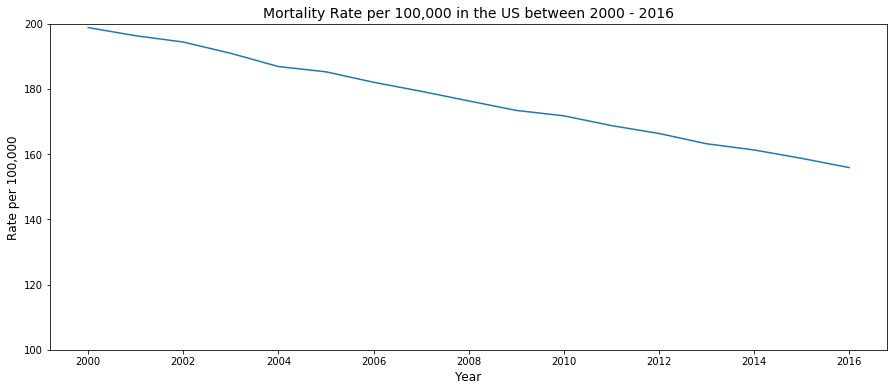

In [9]:
# Create a reduced dataframe with the mortality rate for the entire US population using boolean operators
MortalityAll = mortality[(mortality['Race/Ethnicity'] == 'All Races (includes Hispanic)')
                        & (mortality['Age'] == 'All Ages') & (mortality['Sex'] == 'Both Sexes')]

# Create a plot for the mortality rate between 2000 - 2016

plt.figure(figsize=(15,6))

plt.plot(MortalityAll['Year'], MortalityAll['Rate'])
plt.title('Mortality Rate per 100,000 in the US between 2000 - 2016', size = 14)
plt.xlabel('Year', size = 12)
plt.ylabel('Rate per 100,000', size = 12)
plt.ylim(100,200)

The graph shows the mortality rate of cancer in the US per 100,000 people between 2000 and 2016.

It is clear that cancer mortality rates are decreasing each year, and will most likely keep decreasing each year as cancer treatments get better and knowledge increases. Eventually the number of people who die from cancer will plateau until a cure is found - which I think is quite unlikely in the next 20 years.

### 3.2 Cancer Survival Rate in the US From 2000 - 2016

In [10]:
# For the survival rate, since there are three variables to plot on the same graph,
# group the data by the number of years and the survival time (year)
Survival = survival.groupby(['Year', 'Survival Time']).first()
Survival = pd.DataFrame(Survival.loc[:, 'Rate'])
Survival.head()

Rate
Year   Survival Time         
1 year 2000           77.7698
       2001           78.1998
       2002           78.5229
       2003           78.2767
       2004           78.8625

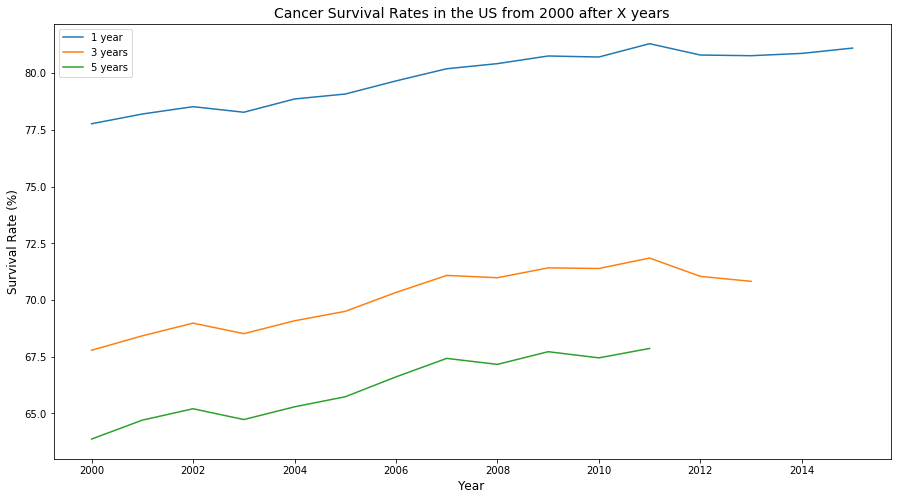

In [11]:
# Create a loop to plot a graph for the survival rate for the different number of years between 2000 and 2016
years = ['1 year', '3 years', '5 years']

# Plot the three variables in the same graph using the loop
plt.figure(figsize=(15,8))

for y in years:
    data = Survival.loc[y, 'Rate']
    plt.plot(data.index, data.values, label = y)
    plt.legend(loc = 'best')
    plt.title('Cancer Survival Rates in the US from 2000 after X years', fontsize = 14)
    plt.ylabel('Survival Rate (%)', fontsize = 12)
    plt.xlabel('Year', fontsize = 12)
    
plt.show()

The graph shows the survival rates in percentage after 1, 3 and 5 years of diagnoses. For 3 and 5 years, there was no data avaliable after a certain number of years, so I plotted what was available.

After 1, 3 and 5 years of diagnosis the survival rates were generally increasing since 2000, but after 3 years of diagnosis, it seems as though the survival rate has decreased between 2012 and 2013. As expected, the shorter the time after the diagnosis, the higher the chance of survival with the survival rate being significantly higher within the first year of diagnosis.

### 3.3 Cancer Rates in the US by State

To plot the cancer rates by state, I used a choropleth but I had to research how to incorporate a slider to the map so that the user and see the change over time.

In [12]:
# Change the state names to their codes using the dictionary below
state['Area'] = state['Area'].replace({'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ',
                       'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
                       'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
                       'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
                       'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
                       'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
                       'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
                       'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
                       'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
                       'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
                       'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
                       'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
                       'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI',
                       'Wyoming': 'WY'})
state.head()

Year Area           CancerType   Rate CaseCount  Population
0  2000   CO  All Types of Cancer  453.9     16774   4326921.0
1  2000   VA  All Types of Cancer  438.6     29629   7105817.0
2  2000   CA  All Types of Cancer  460.1    137413  33987977.0
3  2000   GA  All Types of Cancer  473.2     32991   8227303.0
4  2000   ID  All Types of Cancer  475.4      5678   1299430.0

In [13]:
# Start off the slider map by creating an empty list for the slider
data_slider = []

# Loop over each year in the state dataframe,
# save each unique year as a new variable
for year in state.Year.unique():
    rate_years = state[state['Year']== year]

# Create a dictionary for the current year, which specifies the layout of the plot    
    data_year = dict(type='choropleth',
                    locations = rate_years['Area'],
                    z=rate_years['Rate'].astype(float),
                    locationmode='USA-states',
                    colorscale = 'Reds',
                    colorbar_title = 'Rate per 100,000')
    
    # Append each dictionary to the slider list, so each year has a plot
    data_slider.append(data_year)
    

# Create an empty list for the steps of the slider
steps = []

# Loop over each dictionary in the slider list for the different year plots
for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label=(i + 2000)) # label to be displayed for each step (year)
    step['args'][1][i] = True
    steps.append(step)

##  Create the slider from the steps list initiated above

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

# Set up the layout as for a normal choropleth, but including the slider option

layout = dict(geo=dict(scope='usa',
                projection={'type': 'albers usa'}),
                sliders=sliders,
                title = 'Cancer Rates per 100,000 by State (2000 - 2016)')

# Create the figure object and plot the figure
fig = dict(data=data_slider, layout=layout) 
plotly.offline.iplot(fig)

The graph shows the cancer rates in the US by state between 2000 and 2016, with the slider at the bottom to choose which year to view on the heat map. For the earlier years, there is no data for some of the states; which remain gray.

Overall, the cancer rates have decreased since 2000 and are significantly lower in some states like Nevada which went from 512.8 per 100,000 in 2000 to 385 in 2016. Other states like Kentucky saw a decrease, but are still relatively high. The data shows that cancer rates have decreased more in the western states, and now have the lowest cancer rates. States in the North East have the highest cancer rates in 2016, with Kentucky being the highest.

There are a number of different theories as to why the west coast has such lower rates than the east coast; some say because there are larger, more polluted cities in the east, others say that there is more poverty and less access to healthy foods and some say it is because of the concentration of factories in the east coast compared to the west. The most likely cause is that it is a combination of these reason and more.

## 4. Most Common and Deadliest Types of Cancer Between 2000 - 2016

For this section, the trends of incidence and mortality rates per 100,000 will be looked at for 15 of the most common types of cancer in the US according to the CDC. Each type of cancer has its own dataset for mortality and for incidence rates; therefore 30 datasets will be used for this section. They will be merged into two separate datasets; one for incidence rate per 100,00 and another for mortality rate per 100,000. This will make it easier to clean as all the columns are the same and will allow the data for different cancers to be plotted on the same graph more efficiently.

This will take into account cancer types which are contractable by both sexes.

### 4.1 Incidence and Mortality Rates Between 2000 - 2016

In [14]:
# Instead of reading each individual dataset and then concatenating,
# it is much quicker to create a loop to read then concatenate

path = r'Incidence Rates' # Specify folder

all_files = glob.glob(path + "/*.csv") # For any file ending in '.csv'

# Create an empty list to store the opened datasets
files = []

# Loop through each file, open them using pandas and append to list
for filename in all_files:

    df = pd.read_csv(filename, index_col=None, header=0)

    files.append(df)

# Concatenate all read datasets by columns
IncidenceType = pd.concat(files, axis=0, ignore_index=True, sort = False)

IncidenceType.head()

Sex                 Race/Ethnicity       Age       Rate Type  Year  \
0  Both Sexes  All Races (includes Hispanic)  All Ages  Observed Rates  2000   
1  Both Sexes  All Races (includes Hispanic)  All Ages  Observed Rates  2001   
2  Both Sexes  All Races (includes Hispanic)  All Ages  Observed Rates  2002   
3  Both Sexes  All Races (includes Hispanic)  All Ages  Observed Rates  2003   
4  Both Sexes  All Races (includes Hispanic)  All Ages  Observed Rates  2004   

  Age-adjusted (AA) Rate per 100,000 AA Rate Lower Confidence Interval  \
0                            22.3351                           22.0422   
1                             22.081                           21.7916   
2                            21.9322                           21.6459   
3                            22.1416                           21.8559   
4                             22.869                           22.5802   

  AA Rate Upper Confidence Interval Trend Year Range  \
0                           22.6308        2000-2005   
1                           22.3732        2005-2014   
2                           22.2212        2014-2016   
3                           22.4301              NaN   
4                           23.1606              NaN   

  Annual Percent Change (APC) (%) APC Lower Confidence Interval (%)  \
0                          0.4225                            -0.425   
1                         -1.0936                           -1.4892   
2                         -3.4081                           -6.8478   
3                             NaN                               NaN   
4                             NaN                               NaN   

  APC Upper Confidence Interval (%)   Trend Direction             Type  
0                            1.2771            Stable  Urinary Bladder  
1                           -0.6964  Trend is Falling  Urinary Bladder  
2                            0.1586            Stable  Urinary Bladder  
3                               NaN               NaN  Urinary Bladder  
4                               NaN               NaN  Urinary Bladder

In [15]:
# Clean the dataframe
# After inspecting the dataframe, drop any unwanted or irrelevant columns
IncidenceType.drop(['AA Rate Lower Confidence Interval', 'AA Rate Upper Confidence Interval',
                'Trend Year Range', 'Annual Percent Change (APC) (%)', 'APC Lower Confidence Interval (%)',
                'APC Upper Confidence Interval (%)', 'Trend Direction'], axis = 1, inplace = True)

# Rename any columns to make easier to call upon
IncidenceType.rename(columns = {'Age-adjusted (AA) Rate per 100,000' : 'Rate'}, inplace = True)

# Create a reduced dataframe with the incidence rate for the entire US population using boolean operators
IncidenceTypeClean = IncidenceType[(IncidenceType['Race/Ethnicity'] == 'All Races (includes Hispanic)')
                        & (IncidenceType['Age'] == 'All Ages') & (IncidenceType['Sex'] == 'Both Sexes') 
                        & (IncidenceType['Rate Type'] == 'Observed Rates')]

# Convert the remaining rate values to float, so they can be plotted
IncidenceTypeClean['Rate'] = IncidenceTypeClean['Rate'].astype(float)

# Group by cancer type then year for plotting
IncidenceTypeGrouped = IncidenceTypeClean.groupby(['Type', 'Year']).first()

IncidenceTypeGrouped.head()

Sex  \
Type                           Year               
Brain and Other Nervous System 2000  Both Sexes   
                               2001  Both Sexes   
                               2002  Both Sexes   
                               2003  Both Sexes   
                               2004  Both Sexes   

                                                    Race/Ethnicity       Age  \
Type                           Year                                            
Brain and Other Nervous System 2000  All Races (includes Hispanic)  All Ages   
                               2001  All Races (includes Hispanic)  All Ages   
                               2002  All Races (includes Hispanic)  All Ages   
                               2003  All Races (includes Hispanic)  All Ages   
                               2004  All Races (includes Hispanic)  All Ages   

                                          Rate Type    Rate  
Type                           Year                          
Brain and Other Nervous System 2000  Observed Rates  6.8763  
                               2001  Observed Rates  6.6480  
                               2002  Observed Rates  6.6921  
                               2003  Observed Rates  6.7969  
                               2004  Observed Rates  6.7332

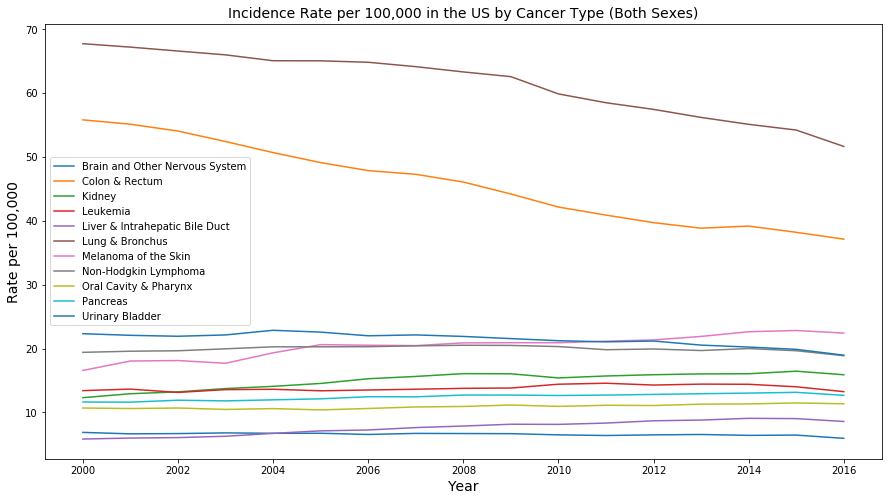

In [16]:
# Create a list of the indexes which are the different cancer types
# and create a loop to plot incidence level for each cancer type
cancerlist = IncidenceTypeGrouped.index.get_level_values(0).unique()
plt.figure(figsize=(15,8))

for c in cancerlist:
    data = IncidenceTypeGrouped.loc[c, 'Rate']
    plt.plot(data.index, data.values, label = c)
    plt.legend(loc = 'best')
    plt.title('Incidence Rate per 100,000 in the US by Cancer Type (Both Sexes)', fontsize = 14)
    plt.ylabel('Rate per 100,000', fontsize = 14)
    plt.xlabel('Year', fontsize = 14)
    
plt.show()

The graph shows the incidence rates per 100,000 for the most common types of cancer in the US between 2000 and 2016. The graph doesnt take into account cancers which are gender specific like prostate, breast or ovarian.

From the graph, it is clear to see that Lung & Bronchus cancer is the most common type of cancer, with Colon & Rectum being the second-most common type. These are also the types of cancers which are decreasing the most in general. Other types of cancer like Melanoma of the Skin are actually increasing and has become the third most common type. The cancers which increase still have a low incidence rate but because they are so low, there is less room for improvement and they are more likely to increase. 

Eventually the same will happen for the most common types too, but overall there will continue to be a decrease in the total incidence rate.

In [17]:
# Instead of reading each individual dataset and then concatenating,
# it is much quicker to create a loop to read then concatenate

path = r'Mortality Rates' # Specify folder

all_files2 = glob.glob(path + "/*.csv") # For any file ending in '.csv'

# Create an empty list to store the opened datasets
files2 = []

# Loop through each file, open them using pandas and append to list
for filename in all_files2:

    df = pd.read_csv(filename, index_col=None, header=0)

    files2.append(df)

# Concatenate all read datasets by columns
MortalityType = pd.concat(files2, axis=0, ignore_index=True, sort = False)

MortalityType.head()

Sex                 Race/Ethnicity       Age  Year  \
0  Both Sexes  All Races (includes Hispanic)  All Ages  2000   
1  Both Sexes  All Races (includes Hispanic)  All Ages  2001   
2  Both Sexes  All Races (includes Hispanic)  All Ages  2002   
3  Both Sexes  All Races (includes Hispanic)  All Ages  2003   
4  Both Sexes  All Races (includes Hispanic)  All Ages  2004   

  Age-adjusted (AA) Rate per 100,000 AA Rate Lower Confidence Interval  \
0                              4.325                             4.248   
1                             4.3481                            4.2713   
2                             4.4272                            4.3503   
3                             4.2999                            4.2247   
4                              4.424                            4.3482   

  AA Rate Upper Confidence Interval Trend Year Range  \
0                            4.4031        2000-2016   
1                            4.4259              NaN   
2                            4.5051              NaN   
3                            4.3761              NaN   
4                            4.5008              NaN   

  Annual Percent Change (APC) (%) APC Lower Confidence Interval (%)  \
0                          0.0157                           -0.0874   
1                             NaN                               NaN   
2                             NaN                               NaN   
3                             NaN                               NaN   
4                             NaN                               NaN   

  APC Upper Confidence Interval (%) Trend Direction             Type  \
0                            0.1189          Stable  Urinary Bladder   
1                               NaN             NaN  Urinary Bladder   
2                               NaN             NaN  Urinary Bladder   
3                               NaN             NaN  Urinary Bladder   
4                               NaN             NaN  Urinary Bladder   

   Unnamed: 13  Unnamed: 14 Unnamed: 15  
0          NaN          NaN         NaN  
1          NaN          NaN         NaN  
2          NaN          NaN         NaN  
3          NaN          NaN         NaN  
4          NaN          NaN         NaN

In [18]:
# Since there are unnamed columns, check if all the types of cancer are in the type column,
# before dropping the three unnamed columns
MortalityType['Type'].unique()

array(['Urinary Bladder', 'Brain and Other Nervous System', 'Breast',
       'Colon & Rectum', 'Kidney', 'Leukemia',
       'Liver & Intrahepatic Bile Duct', 'Lung & Bronchus',
       'Non-Hodgkin Lymphoma', 'Corpus & Uterus, NOS',
       'Oral Cavity & Pharynx', 'Ovary', 'Pancreas', 'Prostate',
       'Melanoma of the Skin'], dtype=object)

In [19]:
# Clean the dataframe
# After inspecting the dataframe, drop any unwanted or irrelevant columns
MortalityType.drop(['AA Rate Lower Confidence Interval', 'AA Rate Upper Confidence Interval',
                'Trend Year Range', 'Annual Percent Change (APC) (%)', 'APC Lower Confidence Interval (%)',
                'APC Upper Confidence Interval (%)', 'Trend Direction',
                'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'], axis = 1, inplace = True)

# Rename any columns to make easier to call upon
MortalityType.rename(columns = {'Age-adjusted (AA) Rate per 100,000' : 'Rate'}, inplace = True)

# Create a reduced dataframe with the mortality rate for the entire US population using boolean operators
MortalityTypeClean = MortalityType[(MortalityType['Race/Ethnicity'] == 'All Races (includes Hispanic)')
                        & (MortalityType['Age'] == 'All Ages') & (MortalityType['Sex'] == 'Both Sexes')]

# Convert the remaining rate values to float, so they can be plotted
MortalityTypeClean['Rate'] = MortalityTypeClean['Rate'].astype(float)

# Group by cancer type then year for plotting
MortalityTypeGrouped = MortalityTypeClean.groupby(['Type', 'Year']).first()

MortalityTypeGrouped.head()

Sex  \
Type                           Year               
Brain and Other Nervous System 2000  Both Sexes   
                               2001  Both Sexes   
                               2002  Both Sexes   
                               2003  Both Sexes   
                               2004  Both Sexes   

                                                    Race/Ethnicity       Age  \
Type                           Year                                            
Brain and Other Nervous System 2000  All Races (includes Hispanic)  All Ages   
                               2001  All Races (includes Hispanic)  All Ages   
                               2002  All Races (includes Hispanic)  All Ages   
                               2003  All Races (includes Hispanic)  All Ages   
                               2004  All Races (includes Hispanic)  All Ages   

                                       Rate  
Type                           Year          
Brain and Other Nervous System 2000  4.5302  
                               2001  4.4477  
                               2002  4.4533  
                               2003  4.4032  
                               2004  4.3068

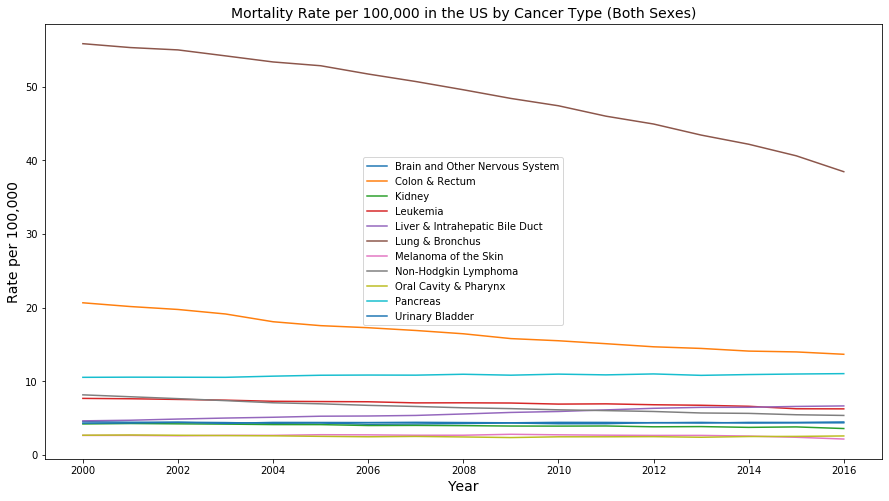

In [20]:
# Create a list of the indexes which are the different cancer types
# and create a loop to plot incidence level for each cancer type
cancerlist2 = MortalityTypeGrouped.index.get_level_values(0).unique()
plt.figure(figsize=(15,8))

for c in cancerlist2:
    data = MortalityTypeGrouped.loc[c, 'Rate']
    plt.plot(data.index, data.values, label = c)
    plt.legend(loc = 'best')
    plt.title('Mortality Rate per 100,000 in the US by Cancer Type (Both Sexes)', fontsize = 14)
    plt.ylabel('Rate per 100,000', fontsize = 14)
    plt.xlabel('Year', fontsize = 14)
    
plt.show()

The graph shows the mortality rates per 100,000 for the most common types of cancer in the US between 2000 and 2016. The graph doesnt take into account cancers which are gender specific like prostate, breast or ovarian.

From the graph, it is clear to see that Lung & Bronchus cancer is the deadliest type of cancer by more than 150%, with Colon & Rectum being the second deadliest type. These are also the types of cancers which are decreasing the most in general, with the mortality rate for Colon & Rectum cancer starting to level out. Most types of cancer have a stable mortality rate, with most of them being under 10 per 100,000. Pancreas cancer is the only cancer which seems to be increasing and looks like it will soon overtake Colon & Rectum cancer. 

Overall, the mortality rate of cancer is decreasing, which is mostly thanks to the fact that Lung & Bronchus mortality rates is rapidly decreasing. 

### 4.2 Average Incidence and Mortality Rates Between 2000 - 2016

In [21]:
# Choose just the type and rate rows from the cleaned data,
# Group the data by type and find the mean for each type,
# Sort the values so they come out in order on the barchart
IncidenceTypeMean = IncidenceTypeClean[['Type', 'Rate']]
IncidenceTypeMean = IncidenceTypeMean.groupby('Type').mean()
IncidenceTypeMean = IncidenceTypeMean.sort_values('Rate', ascending = True)
IncidenceTypeMean.head()

Rate
Type                                     
Brain and Other Nervous System   6.580212
Liver & Intrahepatic Bile Duct   7.622700
Oral Cavity & Pharynx           10.923576
Pancreas                        12.438459
Leukemia                        13.822641

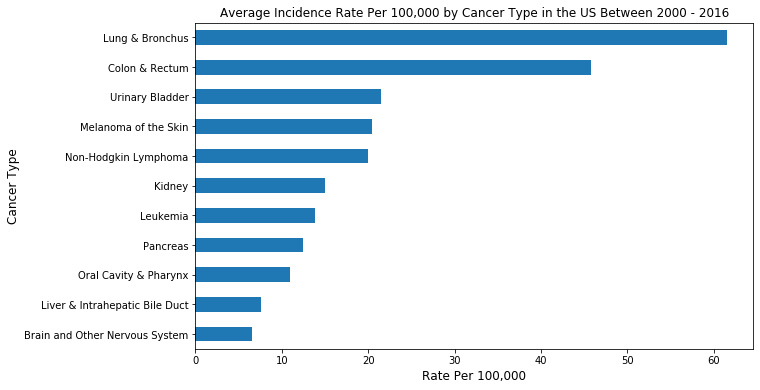

In [22]:
# Plot a horizontal bar graph showing the average incidence rate per 100,000,
# for the difference cancer types between 2000 - 2016
IncidenceTypeMean.plot.barh(legend = False, figsize = (10,6),
        title = 'Average Incidence Rate Per 100,000 by Cancer Type in the US Between 2000 - 2016')
plt.ylabel('Cancer Type', fontsize = 12)
plt.xlabel('Rate Per 100,000', fontsize = 12)
plt.show()

The graph shows the average incidence rate per 100,000 for the most common types of cancer in the US between 2000 and 2016. The types of cancer looked at are those contractable by both sexes.

The graph shows that Lung & Bronchus and Colon & Rectum cancer have the highest average incidence rates, with Brain cancer having the lowest out of the 11. Most of the cancer types have an average incidence between 10 and 25 cases per 100,000. Lung & Bronchus has more than 60 per 100,000 on average; which is significantly higher than most of the other types. 

In [23]:
# Choose just the type and rate rows from the cleaned data,
# Group the data by type and find the mean for each type,
# Sort the values so they come out in order on the barchart
MortalityTypeMean = MortalityTypeClean[['Type', 'Rate']]
MortalityTypeMean = MortalityTypeMean.groupby('Type').mean()
MortalityTypeMean = MortalityTypeMean.sort_values('Rate', ascending = True)
MortalityTypeMean.head()

Rate
Type                                    
Oral Cavity & Pharynx           2.538653
Melanoma of the Skin            2.638371
Kidney                          3.990529
Brain and Other Nervous System  4.356676
Urinary Bladder                 4.388765

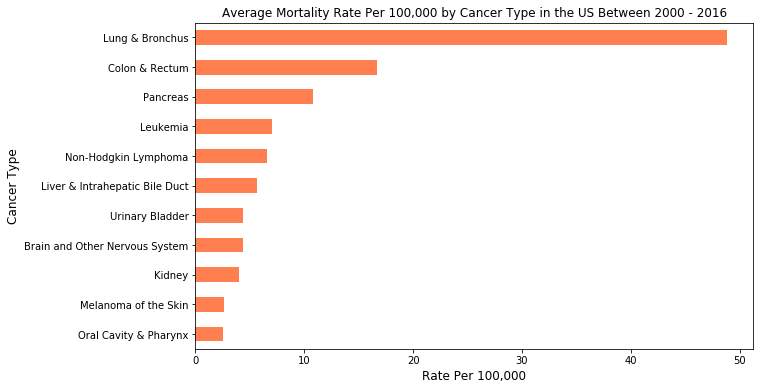

In [24]:
# Plot a horizontal bar graph showing the average incidence rate per 100,000,
# for the difference cancer types between 2000 - 2016
MortalityTypeMean.plot.barh(legend = False, figsize = (10,6),
        title = 'Average Mortality Rate Per 100,000 by Cancer Type in the US Between 2000 - 2016', color = 'coral')
plt.ylabel('Cancer Type', fontsize = 12)
plt.xlabel('Rate Per 100,000', fontsize = 12)
plt.show()

The graph shows the average mortality rate per 100,000 for the most common types of cancer in the US between 2000 and 2016. The types of cancer looked at are those contractable by both sexes.

The graph shows that Lung & Bronchus cancer is clearly the deadliest type of cancer, with its closest rival being less than half of the rate per 100,000. Oral cancer and Melanoma of the Skin have the lowest out of the 11. Most of the cancer types have an average mortality between 0 and 10 deaths per 100,000.

## 5. Cancer and Gender

This section will look at how incidence and mortality rates differ for males and females, which types of cancers occur mostly for males and females and which cancer is the most deadly for each gender. It will also look at how many new cancer cases belong to each gender.

In [25]:
# Create a new dataframe which has incidence data for males and females separately,
# then group the data by Sex then Year
incidencesex = incidence[(incidence['Sex'] != 'Both Sexes') & (incidence['Rate Type'] == 'Observed Rates')]
incidencesex = incidencesex.groupby(['Sex', 'Year']).first()
incidencesex.head()

Race/Ethnicity       Age       Rate Type      Rate
Sex    Year                                                                   
Female 2000  All Races (includes Hispanic)  All Ages  Observed Rates  427.1036
       2001  All Races (includes Hispanic)  All Ages  Observed Rates  427.2801
       2002  All Races (includes Hispanic)  All Ages  Observed Rates  424.5512
       2003  All Races (includes Hispanic)  All Ages  Observed Rates  417.1501
       2004  All Races (includes Hispanic)  All Ages  Observed Rates  419.2505

In [26]:
# Create a new dataframe which has mortality data for males and females separately,
# then group the data by Sex then Year
mortalitysex = mortality[mortality['Sex'] != 'Both Sexes']
mortalitysex = mortalitysex.groupby(['Sex', 'Year']).first()
mortalitysex.head()

Race/Ethnicity       Age      Rate
Sex    Year                                                   
Female 2000  All Races (includes Hispanic)  All Ages  166.7002
       2001  All Races (includes Hispanic)  All Ages  164.6126
       2002  All Races (includes Hispanic)  All Ages  163.3776
       2003  All Races (includes Hispanic)  All Ages  161.1637
       2004  All Races (includes Hispanic)  All Ages  157.9189

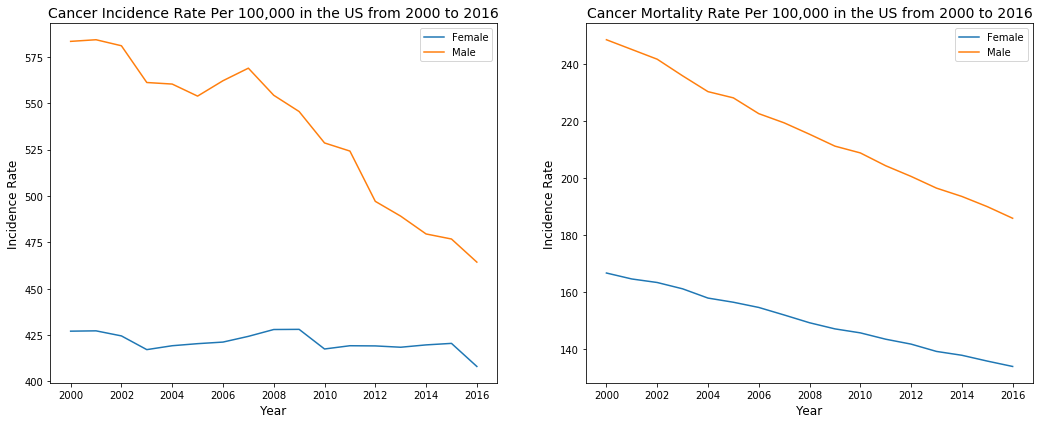

In [27]:
# Create a loop to plot graphs for the incidence rate and mortality rate for males and females between 2000 and 2016
sex = ['Female', 'Male']

plt.figure(figsize=(15,6))

# Create a loop for both the incidence rate and mortality rate data,
# use the subplot function to plot the graphs side by side for ease of comparison

# Loop for incidence data
for s in sex:
    data = incidencesex.loc[s, 'Rate']
    plt.subplot(1,2,1)
    plt.plot(data.index, data.values, label = s)
    plt.legend(loc = 'best')
    plt.title('Cancer Incidence Rate Per 100,000 in the US from 2000 to 2016', fontsize = 14)
    plt.ylabel('Incidence Rate', fontsize = 12)
    plt.xlabel('Year', fontsize = 12)

# Loop for mortality data
for s in sex:
    data = mortalitysex.loc[s, 'Rate']
    plt.subplot(1,2,2)
    plt.plot(data.index, data.values, label = s)
    plt.legend(loc = 'best')
    plt.title('Cancer Mortality Rate Per 100,000 in the US from 2000 to 2016', fontsize = 14)
    plt.ylabel('Incidence Rate', fontsize = 12)
    plt.xlabel('Year', fontsize = 12)
    
plt.tight_layout()  
plt.show()

The graphs show the indicence rate per 100,000 for males and females between 2000 and 2016 (left) and the mortality rate per 100,000 for males and females between 2000 and 2016.

Both the incidence rates and the mortality rates are always higher for men, which has found to be true almost always as healthy male cells transform in cancerous ones more readily (https://www.the-scientist.com/notebook/why-is-cancer-more-common-in-men-than-in-women--65640). However, the incidence rates for men is decreasing at a much faster than women (which is almost the same as 2000). The mortality rates however, are decreasing at a similar rate for men and women. I think that incidence rates and mortality rates will continue to decrease for both genders as technology improves, until the rate of improvement starts to decrease. Eventually incidence and mortality rates will also be very similar for both genders.

### 5.1 Which Cancers are More Common in Males and Females?

In [28]:
# Create a reduced dataframe with the incidence rate for males using boolean operators
IncidenceTypeMale = IncidenceType[(IncidenceType['Race/Ethnicity'] == 'All Races (includes Hispanic)')
                        & (IncidenceType['Age'] == 'All Ages') & (IncidenceType['Sex'] == 'Male') 
                        & (IncidenceType['Rate Type'] == 'Observed Rates')]

# Convert the remaining rate values to float, so they can be plotted
IncidenceTypeMale['Rate'] = IncidenceTypeMale['Rate'].astype(float)

# Reduce the dataframe to Type and Rate
IncidenceTypeMale = IncidenceTypeMale[['Type', 'Rate']]

# Group by cancer type and calculate the mean
IncidenceTypeMale = IncidenceTypeMale.groupby('Type').mean()

# Sort the values
IncidenceTypeMale = IncidenceTypeMale.sort_values('Rate', ascending = True)

IncidenceTypeMale.head()

Rate
Type                                     
Breast                           1.225853
Brain and Other Nervous System   7.785829
Liver & Intrahepatic Bile Duct  11.832053
Pancreas                        14.078235
Oral Cavity & Pharynx           16.373800

In [29]:
# Do the same as above, but this time for females instead of males
IncidenceTypeFemale = IncidenceType[(IncidenceType['Race/Ethnicity'] == 'All Races (includes Hispanic)')
                        & (IncidenceType['Age'] == 'All Ages') & (IncidenceType['Sex'] == 'Female') 
                        & (IncidenceType['Rate Type'] == 'Observed Rates')]

# Convert the remaining rate values to float, so they can be plotted
IncidenceTypeFemale['Rate'] = IncidenceTypeFemale['Rate'].astype(float)

# Reduce the dataframe to Type and Rate
IncidenceTypeFemale = IncidenceTypeFemale[['Type', 'Rate']]

# Group by cancer type and calculate the mean
IncidenceTypeFemale = IncidenceTypeFemale.groupby('Type').mean()

# Sort the values
IncidenceTypeFemale = IncidenceTypeFemale.sort_values('Rate', ascending = True)

IncidenceTypeFemale.head()

Rate
Type                                     
Liver & Intrahepatic Bile Duct   4.039206
Brain and Other Nervous System   5.553747
Oral Cavity & Pharynx            6.287053
Urinary Bladder                  9.431129
Kidney                          10.314635

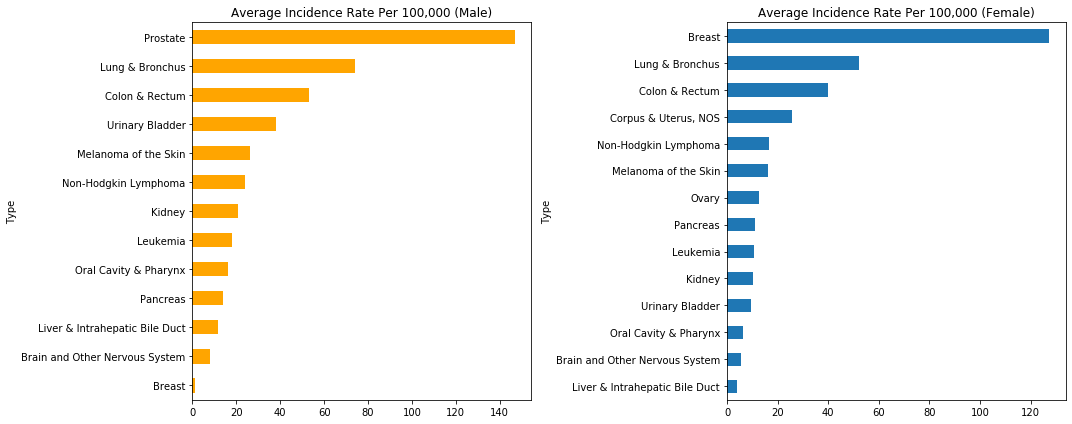

In [30]:
# Initialise 2 columns to plot the graphs side by side
fig, axes = plt.subplots(nrows=1, ncols=2)

# Plot the male incidence graph
IncidenceTypeMale.plot.barh(legend = False, figsize = (15,6), ax=axes[0],
        title = 'Average Incidence Rate Per 100,000 (Male)', color = 'orange')

# Plot the female incidence graph
IncidenceTypeFemale.plot.barh(legend = False, figsize = (15,6), ax=axes[1],
        title = 'Average Incidence Rate Per 100,000 (Female)')

plt.tight_layout()
plt.show()

The graphs show the average incidence rate per 100,000 for men in the US between 2000 and 2016 for different cancer types (left) and the average incidence rate per 100,000 for women in the US between 2000 and 2016 for different cancer types (right). This time cancers exclusively for each gender have been included.

The graphs show that for men and women, the most common type of cancer is the cancer which is associated with their gender. For men, prostate cancer is the most common and for women its breast cancer. Surprisingly, at the bottom of the male incidence chart, breast cancer appears with around 1 in 100,000; this is accurate because men can actually (but very rarely) develop breast cancer as they too have breast cells - just a lot less than women (https://www.nationalbreastcancer.org/male-breast-cancer). 

On the whole, the types of cancers which affect each gender are more or less the same in order of incidence; with men being more likely to get cancer overall, but it seems kidney cancer has a higher percentage of incidences in men and pancreas cancer in women. This is expected as men and women have different body compositions.

### 5.2 Which Cancers are More Deadly in Males and Females?

In [31]:
# Create a reduced dataframe with the mortality rate for males using boolean operators
MortalityTypeMale = MortalityType[(MortalityType['Race/Ethnicity'] == 'All Races (includes Hispanic)')
                        & (MortalityType['Age'] == 'All Ages') & (MortalityType['Sex'] == 'Male')]

# Convert the remaining rate values to float, so they can be plotted
MortalityTypeMale['Rate'] = MortalityTypeMale['Rate'].astype(float)

# Reduce the dataframe to Type and Rate
MortalityTypeMale = MortalityTypeMale[['Type', 'Rate']]

# Group by cancer type and calculate the mean
MortalityTypeMale = MortalityTypeMale.groupby('Type').mean()

# Sort the values
MortalityTypeMale = MortalityTypeMale.sort_values('Rate', ascending = True)

MortalityTypeMale.head()

Rate
Type                                    
Breast                          0.299176
Oral Cavity & Pharynx           3.897424
Melanoma of the Skin            3.912194
Brain and Other Nervous System  5.323141
Kidney                          5.813106

In [32]:
# Create a reduced dataframe with the mortality rate for females using boolean operators
MortalityTypeFemale = MortalityType[(MortalityType['Race/Ethnicity'] == 'All Races (includes Hispanic)')
                        & (MortalityType['Age'] == 'All Ages') & (MortalityType['Sex'] == 'Female')]

# Convert the remaining rate values to float, so they can be plotted
MortalityTypeFemale['Rate'] = MortalityTypeFemale['Rate'].astype(float)

# Reduce the dataframe to Type and Rate
MortalityTypeFemale = MortalityTypeFemale[['Type', 'Rate']]

# Group by cancer type and calculate the mean
MortalityTypeFemale = MortalityTypeFemale.groupby('Type').mean()

# Sort the values
MortalityTypeFemale = MortalityTypeFemale.sort_values('Rate', ascending = True)

MortalityTypeFemale.head()

Rate
Type                                    
Oral Cavity & Pharynx           1.413012
Melanoma of the Skin            1.678471
Urinary Bladder                 2.217206
Kidney                          2.574124
Liver & Intrahepatic Bile Duct  3.442835

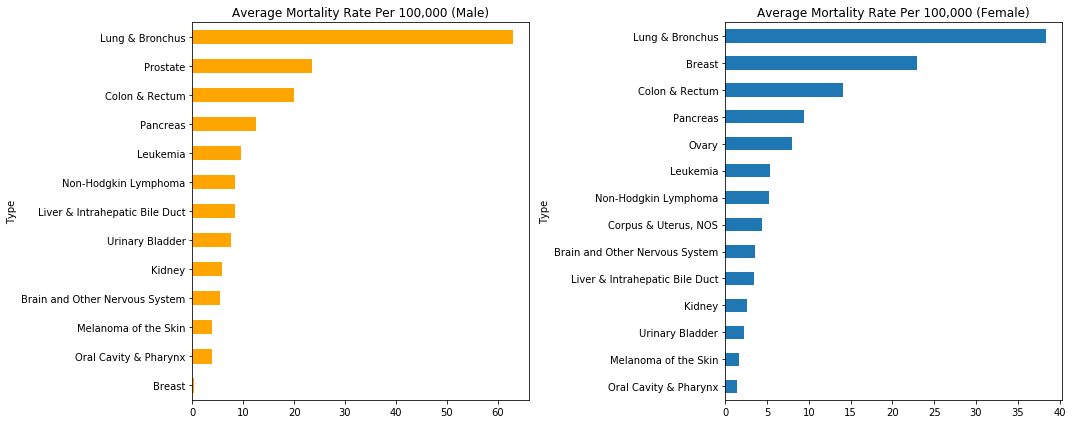

In [33]:
# Initialise 2 columns to plot the graphs side by side
fig, axes = plt.subplots(nrows=1, ncols=2)

# Plot the male mortality graph
MortalityTypeMale.plot.barh(legend = False, figsize = (15,6), ax=axes[0],
        title = 'Average Mortality Rate Per 100,000 (Male)', color = 'orange')

# Plot the female mortality graph
MortalityTypeFemale.plot.barh(legend = False, figsize = (15,6), ax=axes[1],
        title = 'Average Mortality Rate Per 100,000 (Female)')

plt.tight_layout()
plt.show()

The graphs show the average mortality rate per 100,000 for men in the US between 2000 and 2016 for different cancer types (left) and the average incidence rate per 100,000 for women in the US between 2000 and 2016 for different cancer types (right). This time cancers exclusively for each gender have been included.

The graphs show that for men and women, the deadly type of cancer is lung & bronchus cancer (which has an almost double mortality rate for men). This is because 'you can neither see nor feel your lungs, so the main way it is diagnosed is when it causes symptoms such as a cough or pain. Unfortunately, symptoms usually only occur when the cancer has become too advanced to cure. However, much like breast, colon or many other common cancers, lung cancers detected as the earliest stage (Stage 1) can be cured with surgery or radiation 80 percent or more of the time', - https://health.usnews.com/health-news/patient-advice/articles/2015/06/30/why-lung-cancer-is-the-deadliest-cancer-and-why-it-doesnt-have-to-be. For men, prostate cancer is the second most deadly and for women its breast cancer. Again, breast cancer is there for men, but appears for reasons discussed and is almost 0.

On the whole, the types of cancers which affect each gender are more or less the same in order of mortality; with men being more likely to die from cancer overall. All types of cancers except breast, over and corpus & uterus (which can mainly only be contracted by women), have a higher mortality rate in men.

### 5.3 Looking at Cancer Prevalence (as at 1st Jan 2016) by Gender

In [34]:
# Read the prevalence data
prevalence = pd.read_csv('prevalence.csv')
prevalence.head()

Sex Age at Prevalence  Estimated U.S. Prevalence Count
0  Both Sexes          All Ages                         15338988
1  Both Sexes         Ages < 50                          1683014
2  Both Sexes        Ages 50-64                          4157610
3  Both Sexes          Ages 65+                          9498363
4  Both Sexes          Ages <15                            71034

In [35]:
# Choose the prevalence data for all ages but for male and female separately
prevalencesex = prevalence[(prevalence['Age at Prevalence'] == 'All Ages') & (prevalence['Sex'] != 'Both Sexes')]
prevalencesex

Sex Age at Prevalence  Estimated U.S. Prevalence Count
10  Female          All Ages                          8292168
20    Male          All Ages                          7046820

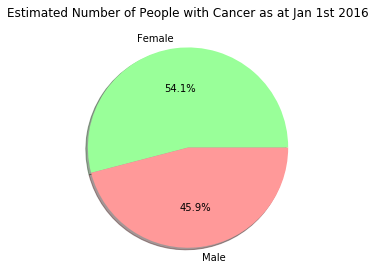

In [36]:
# Create a pie chart to show the breakdown of number of people who currently (1st Jan 2016),
# have cancer, by sex

# Group the number of cases by sex and reduce dataframe to just sex and count
prevalencesex = prevalencesex.groupby('Sex').first()
prevalencesex = pd.DataFrame(prevalencesex.loc[:, 'Estimated U.S. Prevalence Count'])

# Plot the pie chart
prevalencesex.plot.pie(subplots = True, labels = ['Female', 'Male'],
                       autopct='%.1f%%', colors = ['#99ff99', '#ff9999'],
                       shadow = True, legend = False)
plt.title('Estimated Number of People with Cancer as at Jan 1st 2016')
plt.tight_layout()
plt.ylabel(' ')
plt.show()

This graph shows the composition of the number of cancer cases as at 1st Jan 2016 for men and women.

Contrary to intuition that more men would have cancer, there were actually more women with cancer as of 1st Jan 2016 than men. However, the total number of deaths it still higher in men.

## 6. Cancer and Age

This section will look at how incidence and mortality rates differ for different age groups. It will also look at how many new cancer cases belong to each age group.

In [37]:
# Create a new dataframe which has incidence data for different age groups separately;
# remove age groups which overlap with one another
# then group the data by Age Group then Year
incidenceage = incidence[(incidence['Age'] != 'All Ages') & (incidence['Rate Type'] == 'Observed Rates')
                         & (incidence['Age'] != 'Ages 65+') & (incidence['Age'] != 'Ages < 20')
                         & (incidence['Age'] != 'Ages < 50')
                         & (incidence['Age'] != 'Ages 50-64')]
incidenceage = incidenceage.groupby(['Age', 'Year']).first()
incidenceage.head()

Sex                 Race/Ethnicity       Rate Type  \
Age        Year                                                              
Ages 15-39 2000  Both Sexes  All Races (includes Hispanic)  Observed Rates   
           2001  Both Sexes  All Races (includes Hispanic)  Observed Rates   
           2002  Both Sexes  All Races (includes Hispanic)  Observed Rates   
           2003  Both Sexes  All Races (includes Hispanic)  Observed Rates   
           2004  Both Sexes  All Races (includes Hispanic)  Observed Rates   

                    Rate  
Age        Year           
Ages 15-39 2000  65.9221  
           2001  67.0772  
           2002  67.3044  
           2003  67.3200  
           2004  68.6307

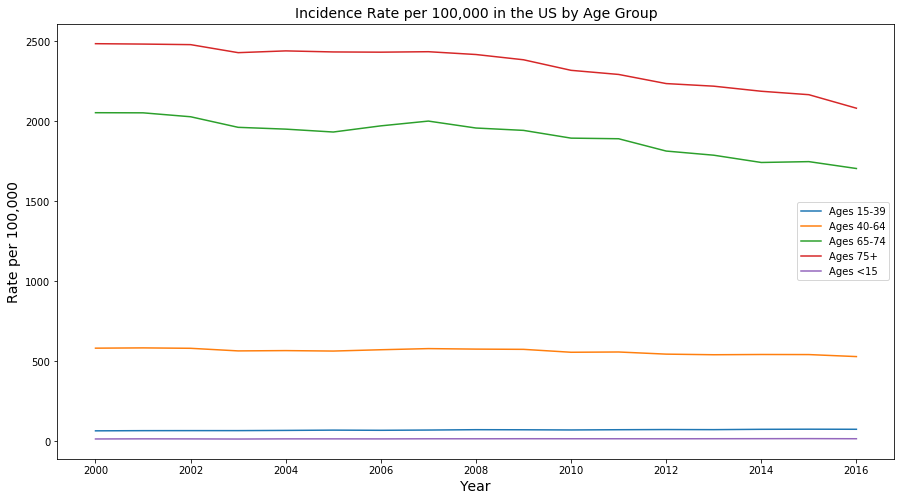

In [38]:
# Create a list of the indexes which are the age groups
# and create a loop to plot incidence rate for each age group
agelist = incidenceage.index.get_level_values(0).unique()
plt.figure(figsize=(15,8))

for a in agelist:
    data = incidenceage.loc[a, 'Rate']
    plt.plot(data.index, data.values, label = a)
    plt.legend(loc = 'best')
    plt.title('Incidence Rate per 100,000 in the US by Age Group', fontsize = 14)
    plt.ylabel('Rate per 100,000', fontsize = 14)
    plt.xlabel('Year', fontsize = 14)
    
plt.show()

The graph shows the incidence rate per 100,000 in the US between 2000 and 2016 for 5 different age groups.

Those who are older than 65 years have a much higher chance of getting cancer as the incidence rate goes from approximately 550 in 100,000 for 40 - 64 year olds, to appromiately 1800 in 100,000 for 65 - 74 year olds. The older someone is, the greater the risk of contracting cancer; with those below the age of 40 having a very low chance as the rate is below 100 in 100,000 for both age groups below 40. The incidence rates for those over 64 seems to be generally decreasing.

Younger people have a better immmune system and usually have healthier habits, which helps fight against cancer. Those who are very old have weaker immune systems and many of them dont have healthy habits likes exercise or good food. This greatly increases the chance of getting cancer.

In [39]:
# Create a new dataframe which has mortality data for different age groups separately;
# remove age groups which overlap with one another
# then group the data by Age Group then Year
mortalityage = mortality[(mortality['Age'] != 'All Ages') & (mortality['Age'] != 'Ages 65+')
                         & (mortality['Age'] != 'Ages < 20')
                         & (mortality['Age'] != 'Ages < 50')
                         & (mortality['Age'] != 'Ages 50-64')]
mortalityage = mortalityage.groupby(['Age', 'Year']).first()
mortalityage.head()

Sex                 Race/Ethnicity     Rate
Age        Year                                                    
Ages 15-39 2000  Both Sexes  All Races (includes Hispanic)  11.0589
           2001  Both Sexes  All Races (includes Hispanic)  11.1076
           2002  Both Sexes  All Races (includes Hispanic)  10.7873
           2003  Both Sexes  All Races (includes Hispanic)  10.4566
           2004  Both Sexes  All Races (includes Hispanic)  10.0605

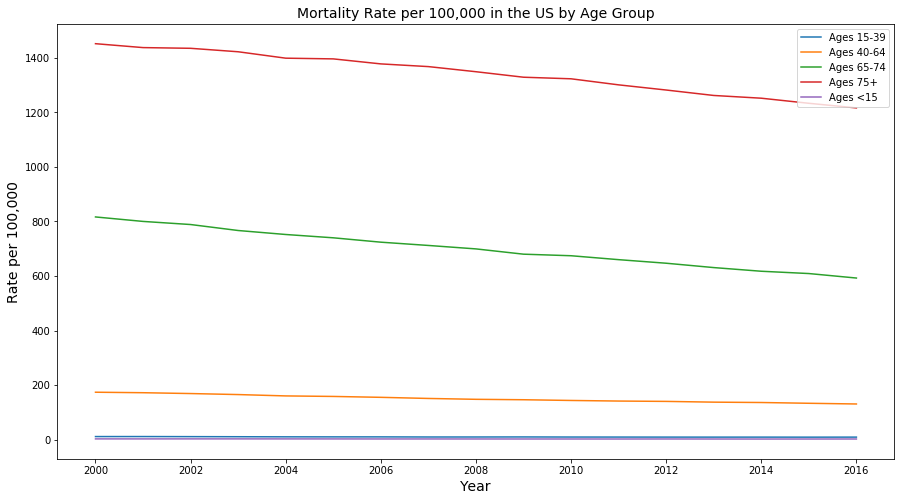

In [40]:
# Create a list of the indexes which are the age groups
# and create a loop to plot mortality rate for each age group
agelist2 = mortalityage.index.get_level_values(0).unique()
plt.figure(figsize=(15,8))

for a in agelist2:
    data = mortalityage.loc[a, 'Rate']
    plt.plot(data.index, data.values, label = a)
    plt.legend(loc = 'best')
    plt.title('Mortality Rate per 100,000 in the US by Age Group', fontsize = 14)
    plt.ylabel('Rate per 100,000', fontsize = 14)
    plt.xlabel('Year', fontsize = 14)
    
plt.show()

The graph shows the mortality rate per 100,000 in the US between 2000 and 2016 for 5 different age groups.

As expected, those who are older than 65 years also have a much higher chance of dying from cancer as the mortality rate goes from approximately 180 in 100,000 for 40 - 64 year olds, to appromiately 700 in 100,000 for 65 - 74 year olds. The older someone is, the greater the risk of dying from cancer; with those below the age of 40 having a very low chance as the rate is almost 0 in 100,000 for both age groups below 40. Like for the incidence rate, the mortality rates for those over 64 seems to be generally decreasing. The main difference between both graphs is that 65 - 74 year olds are much less likely to die from cancer than over 75s when compared to the likelihood between the two groups of contracting cancer.

Younger people have a better immmune system and usually have healthier habits, which helps fight against cancer. Those who are very old have weaker immune systems and many of them dont have healthy habits likes exercise or good food. This greatly increases the chance of dying from cancer.

### 6.1 Looking at Cancer Prevalence (as at 1st Jan 2016) by Age Group

For the prevalence, there were more refined groups which will make it easier to see which ages have the biggest cancer rates more accurately.

In [41]:
# Choose the prevalence data for both sexes but for the different age groups separately
prevalenceage = pd.read_csv('prevalenceage.csv')
prevalenceage.head()

CancerType  Year      Age  CaseCount  Population
0   All Cancer Sites Combined   2016      <1        1112     3955377
1   All Cancer Sites Combined   2016     1-4        3535    15964200
2   All Cancer Sites Combined   2016     5-9        2726    20429504
3   All Cancer Sites Combined   2016   10-14        3224    20627202
4   All Cancer Sites Combined   2016   15-19        5084    21151384

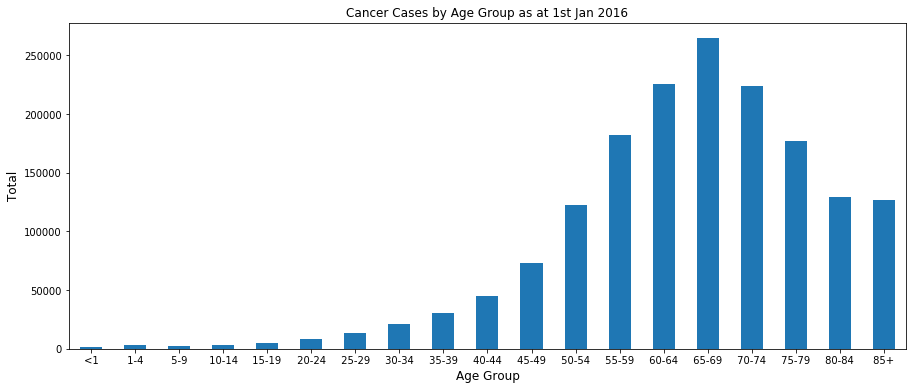

In [42]:
# Create a new dataframe with just the age groups and the count,
# set the index to be the Age groups and plot a bar graph
prevalenceageplot = prevalenceage[['Age', 'CaseCount']]
prevalenceageplot.set_index('Age', inplace = True)

prevalenceageplot.plot(legend = False, kind = 'bar', figsize = (15,6),
                       title = 'Cancer Cases by Age Group as at 1st Jan 2016')
plt.ylabel('Total', fontsize = 12)
plt.xlabel('Age Group', fontsize = 12)
plt.xticks(rotation=0)
plt.show()

The graph shows the number of cancer cases for each age group. There were small age groups for the prevalence data, which will give a more accurate indication.

When it comes to number of cases, those between the ages of 65-69 account for the largest percentage of cancer cases. Even though the incidence rate is lower for those who are under 75 than over, there are much more people who live to 65-69. Due to the fact that 64-75 year olds having a higher chance over getting cancer, the account for the biggest amount of cancer cases as there as much more people alive within this age group.

## 7. Cancer and Race

This section will look at how incidence and mortality rates differ for different races/ethnic groups. It will also look at how many new cancer cases belong to each race/ethnic group.

In [43]:
# Create a new dataframe which has incidence data for different race groups separately;
# then group the data by Race then Year
incidencerace = incidence[(incidence['Age'] == 'All Ages') & (incidence['Rate Type'] == 'Observed Rates')
                         & (incidence['Race/Ethnicity'] != 'All Races (includes Hispanic)')]
incidencerace = incidencerace.groupby(['Race/Ethnicity', 'Year']).first()
incidencerace.head()

Sex       Age  \
Race/Ethnicity                                     Year                         
American Indian / Alaska Native (includes Hispa... 2000  Both Sexes  All Ages   
                                                   2001  Both Sexes  All Ages   
                                                   2002  Both Sexes  All Ages   
                                                   2003  Both Sexes  All Ages   
                                                   2004  Both Sexes  All Ages   

                                                              Rate Type  \
Race/Ethnicity                                     Year                   
American Indian / Alaska Native (includes Hispa... 2000  Observed Rates   
                                                   2001  Observed Rates   
                                                   2002  Observed Rates   
                                                   2003  Observed Rates   
                                                   2004  Observed Rates   

                                                             Rate  
Race/Ethnicity                                     Year            
American Indian / Alaska Native (includes Hispa... 2000  304.5388  
                                                   2001  341.4577  
                                                   2002  320.7003  
                                                   2003  334.3623  
                                                   2004  345.8908

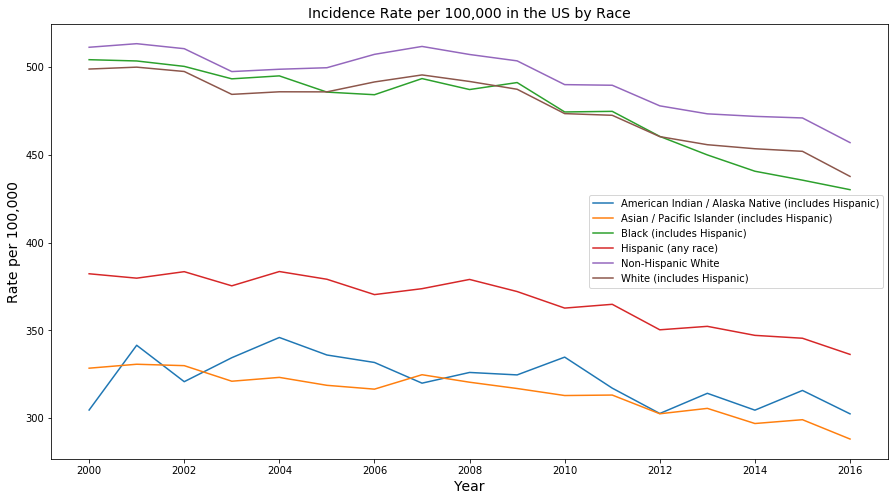

In [44]:
# Create a list of the indexes which are the ethnic groups
# and create a loop to plot incidence rate for each race group
racelist = incidencerace.index.get_level_values(0).unique()
plt.figure(figsize=(15,8))

for r in racelist:
    data = incidencerace.loc[r, 'Rate']
    plt.plot(data.index, data.values, label = r)
    plt.legend(loc = 'best')
    plt.title('Incidence Rate per 100,000 in the US by Race', fontsize = 14)
    plt.ylabel('Rate per 100,000', fontsize = 14)
    plt.xlabel('Year', fontsize = 14)
    
plt.show()

This graph shows the incidence rate per 100,000 in the US between 2000 and 2016 for different races/ethnic groups.

The incidence rates for black and white people are much higher when compared to other minorities. Asians/Pacific Islanders have the lowest incidence rates; which is around 50% lower than the race with the highest incidence. Overall, the incidence rates are decreasing, with American Indians/Alaska Natives having a higher incidence rate in 2016 compared to 2000.

In [45]:
# Create a new dataframe which has mortality data for different race groups separately;
# then group the data by Race then Year
mortalityrace = mortality[(mortality['Age'] == 'All Ages') 
                          & (mortality['Race/Ethnicity'] != 'All Races (includes Hispanic)')]
mortalityrace = mortalityrace.groupby(['Race/Ethnicity', 'Year']).first()
mortalityrace.head()

Sex       Age  \
Race/Ethnicity                                     Year                         
American Indian / Alaska Native (includes Hispa... 2000  Both Sexes  All Ages   
                                                   2001  Both Sexes  All Ages   
                                                   2002  Both Sexes  All Ages   
                                                   2003  Both Sexes  All Ages   
                                                   2004  Both Sexes  All Ages   

                                                             Rate  
Race/Ethnicity                                     Year            
American Indian / Alaska Native (includes Hispa... 2000  155.8223  
                                                   2001  168.6547  
                                                   2002  164.1121  
                                                   2003  160.2663  
                                                   2004  170.2962

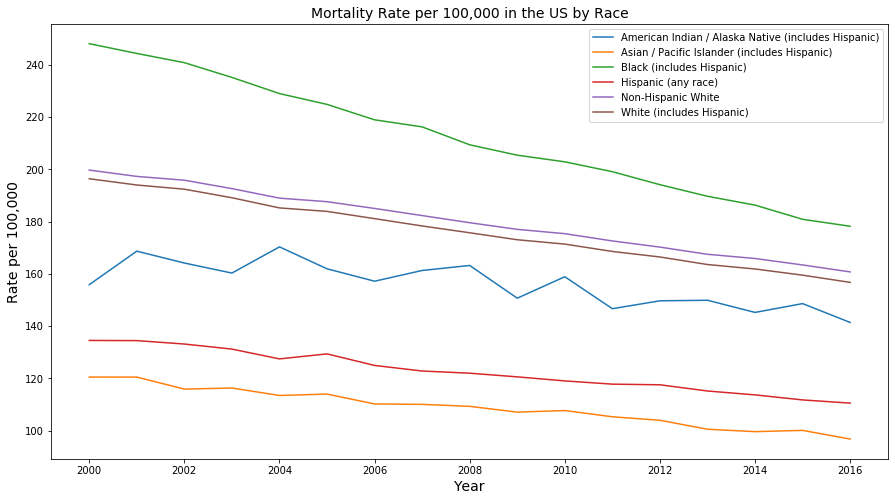

In [46]:
# Create a list of the indexes which are the ethnic groups
# and create a loop to plot mortality rate for each race group
racelist2 = mortalityrace.index.get_level_values(0).unique()
plt.figure(figsize=(15,8))

for r in racelist2:
    data = mortalityrace.loc[r, 'Rate']
    plt.plot(data.index, data.values, label = r)
    plt.legend(loc = 'best')
    plt.title('Mortality Rate per 100,000 in the US by Race', fontsize = 14)
    plt.ylabel('Rate per 100,000', fontsize = 14)
    plt.xlabel('Year', fontsize = 14)
    
plt.show()

This graph shows the mortality rate per 100,000 in the US between 2000 and 2016 for different races/ethnic groups.

The mortality rates for black people is the highest, and even though they had a lower incidence rate than white people (including and excluding hispanics), they clearly have the highest mortality rate. Much of the difference is because of lower socioeconomic status and less access to medical care, but the gap has been closing every year since 2012. Asians/Pacific Islanders had the lowest mortality rate of any race.
 
The mortality rates are generally decreasing each year, with American Indians/Alaska Natives having the slowest decrease and Blacks having the fastest decrease.

### 7.1 Looking at Cancer Incidence Rate (as at 1st Jan 2016) by Race 

Apart from comparing the current number of cancer rates for each race group, they will also be split into male and female. To do this, the prevalence dataset will be initially split into male and female and then plotted side by side. There is no point comparing the total cases as there are much more white people in the US than any other race. It is more significant to look at the rate per 100,000.

In [47]:
# Choose the prevalence data for the different race groups
prevalencerace = pd.read_csv('prevalencerace.csv')
prevalencerace.head()

CancerType  Year                           Race   Sex  \
0  All Cancer Sites Combined  2016  American Indian/Alaska Native  Male   
1  All Cancer Sites Combined  2016         Asian/Pacific Islander  Male   
2  All Cancer Sites Combined  2016                          Black  Male   
3  All Cancer Sites Combined  2016                       Hispanic  Male   
4  All Cancer Sites Combined  2016                          White  Male   

    Rate  CaseCount  Population  
0  281.9       4691     2323356  
1  278.0      24112     9903590  
2  499.8      91669    21764762  
3  353.8      62833    29166971  
4  466.1     691841   125252109

In [48]:
# Start by choose the males for each race group,
# then reducing the dataframe to just the race and count,
# finally set the race as the index for plotting
malerace = prevalencerace[prevalencerace['Sex'] == 'Male']
malerace = malerace[['Race', 'Rate']]
malerace.set_index('Race', inplace = True)
malerace.head()

Rate
Race                                
American Indian/Alaska Native  281.9
Asian/Pacific Islander         278.0
Black                          499.8
Hispanic                       353.8
White                          466.1

In [49]:
# Then choose the females for each race group,
# then reduce the dataframe to just the race and count,
# finally set the race as the index for plotting
femalerace = prevalencerace[prevalencerace['Sex'] == 'Female']
femalerace = femalerace[['Race', 'Rate']]
femalerace.set_index('Race', inplace = True)
femalerace.head()

Rate
Race                                
American Indian/Alaska Native  272.6
Asian/Pacific Islander         279.8
Black                          388.5
Hispanic                       327.5
White                          418.5

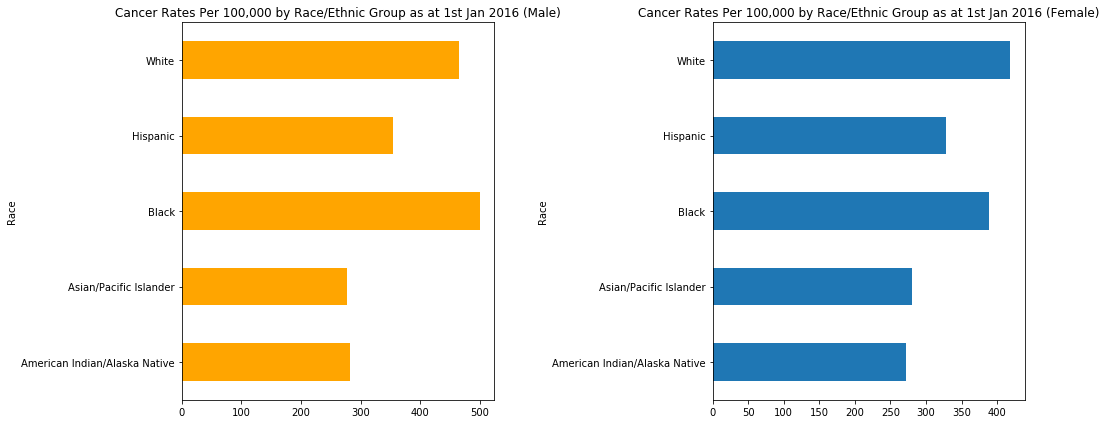

In [50]:
# Initialise 2 columns to plot the graphs side by side
fig, axes = plt.subplots(nrows=1, ncols=2)

# Plot the cases by race group for males
malerace.plot.barh(legend = False, figsize = (15,6), ax=axes[0],
        title = 'Cancer Rates Per 100,000 by Race/Ethnic Group as at 1st Jan 2016 (Male)', color = 'orange')

# Plot the cases by race group for females
femalerace.plot.barh(legend = False, figsize = (15,6), ax=axes[1],
        title = 'Cancer Rates Per 100,000 by Race/Ethnic Group as at 1st Jan 2016 (Female)')

plt.tight_layout()
plt.show()

The graphs show the cancer incidence rate per 100,000 in the US as at 1st Jan 2016 for males from different races/ethnic groups (left) and females from different races/ethnic groups (right).

As shown before, males have a higher incidence rate than women due to their cell composition; which hold true for every race/ethnic group. The group with the highest incidence rate are black males and the group with the lowest incidence rate are American Indian/Alaska Native Women. The interesting fact is that even though black men have a higher cancer rate than white men, black women have a lower cancer rate than white women. The biggest difference in rates by gender also occurs for black people; with men having almost 500 in 100,000 and women having less than 400.

Asians/Pacific Islanders and American Indians/Alaska natives have the lowest incidence rates for both men and women, so they must be doing something right.

## 8. Predictions

From the data gathered and the graphs plotted, there are clear patterns which can be observed. These patterns do not just show what is happening or what has happened; they also serve as an indicator for the future, allowing for predictions to be made based on these patterns.

Overall, the cancer incidence rate and mortality rate has been decreasing since 2000 and I believe will continue to decrease as more people are aware of the different screenings available, the screenings and other methods become more accessible and are more accurate, and treatments become more effective. Eventually the rate of decrease will slow down and level out as there will be a point where no matter how advanced, people will always get cancer. However, if a cure is found it means that the mortality rate will drop to 0 or almost 0 as not everyone will be able to afford the cure. This is very unlikely to happen anytime soon for various reasons.

When looking at cancer rates for the different types of cancer, the cancers which are more common or deadly because they are hard to diagnose in time will eventually fall, as bettter screenings for cancers such as lung cancer will mean that people will be able to catch and treat the disease in time. Other cancers such as breast or prostate cancer will remain the most common types for males and females, without decreasing much because these cancers are mainly due to hormones.

For rates between men and women, the incidence rates and mortality rates will continue to drop and eventually plateau. I believe that the incidence level will always be higher for men as they are more susceptible to contract cancer to due their chemical composition. I also believe that the mortality rate will eventually become the same or almost the same; even though more men get more cancer, doesnt mean more men have to die of cancer, especially when treatments and screenings are becoming increasingly advanced and effective.

I think that for ethnic groups, those such as Asians, Pacific Islanders and Native Americans will always remain the lowest as their genes are better equipped for fighting cancer than white or black people. The biggest change will be in cancer rates amongst black people, because as discussed previously, they will become less empoverished and will be able to afford better treatments.

As medicine gets better, people are living longer, which also means that the number of cancer cases will be even greater for those over the ages of 75, as there will be a lot more people living to this age.

Overall, taking into account the trends and new treatments and technology, I think that cancer rates in the US will continue to decrease for the next 10 years at least.

## 9. Conclusion

From the data gathered and plots created, there are a few conclusions which can be made.

In general, cancer rates have been decreasing each year since 2000 each year; but most importantly, the biggest decreases have been occuring more recently. It is clear that the west coast of the US has had the biggest decrease and now have the lowest incidence rates of the country. Mer are also more likely to contract and die from the disease.

It is also clear that the deadlist cancers like Lung & Bronchus cancer are becoming much less deadly; with Lung & Bronchus cancer being the deadlist cancer, prostate being the most common in men and breast the most common in women. Lung & Bronchus cancer however is the most common cancer overall.

As expected, the older you get, the more likely you are to get and die from cancer. When it comes to a certain age group, those who are 75+ have the highest chance of getting and dying from cancer. As for race groups, black men are most likely to get cancer and black people in general are most likely to die from cancer.

Overall, cancer rates have been decreasing, especially more recently and will probably continue to decline for a number of years. There are some factors which will speed up this decline.

## Bibliography & Websites

National Cancer Institute - https://www.cancer.gov/about-cancer/understanding/statistics

Centers for Disease Control & Prevention (CDC) - https://www.cdc.gov/

National Institutes of Health - https://www.nih.gov/

American Cancer Society - https://www.cancer.org/

National Breast Cancer Foundation - https://www.nationalbreastcancer.org/male-breast-cancer

Why is cancer more common in men than women? - https://www.the-scientist.com/notebook/why-is-cancer-more-common-in-men-than-in-women--65640

Why Lung Cancer is the Deadliest Cancer, and Why it Doesn’t Have to Be - https://health.usnews.com/health-news/patient-advice/articles/2015/06/30/why-lung-cancer-is-the-deadliest-cancer-and-why-it-doesnt-have-to-be